<a href="https://colab.research.google.com/github/SakshiAgarwal0717/python_mpro/blob/main/s_m_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.9 MB/s eta 0:00:00


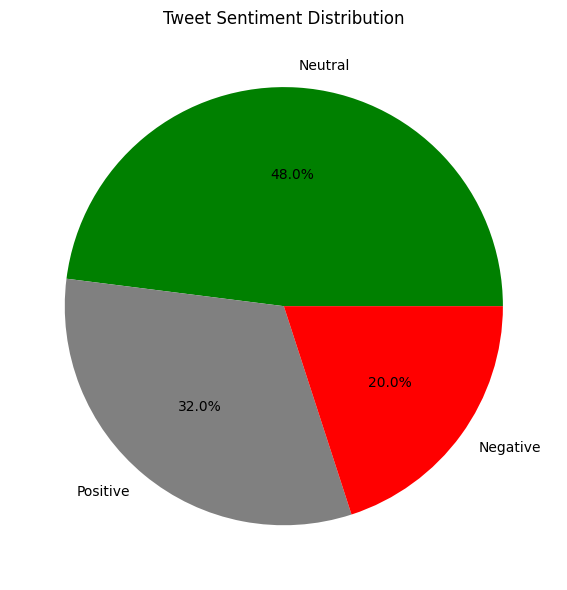

In [1]:
# Social Media Analytics Dashboard

# Install required libraries
!pip install ipywidgets matplotlib pandas

# Import Required Libraries
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import random
from datetime import datetime, timedelta

# Generate Sample Tweet Data
def generate_sample_tweets(num_tweets=50):
    """
    Generate a sample dataset of tweets with various attributes
    """
    # Sample users and hashtags
    users = ['tech_guru', 'travel_lover', 'foodie_blog', 'fitness_pro', 'music_fan']
    hashtags_pool = ['#technology', '#travel', '#food', '#fitness', '#music',
                     '#coding', '#adventure', '#healthylife', '#startup', '#AI']

    # Sentiment categories with weighted distribution
    sentiments = ['Positive', 'Neutral', 'Negative']

    tweets = []
    base_date = datetime.now() - pd.Timedelta(days=30)

    for i in range(num_tweets):
        tweet = {
            'id': i + 1,
            'user': random.choice(users),
            'likes': random.randint(10, 500),
            'retweets': random.randint(1, 100),
            'hashtags': random.sample(hashtags_pool, random.randint(1, 3)),
            'sentiment': random.choices(sentiments, weights=[0.4, 0.4, 0.2])[0],
            'timestamp': base_date + pd.Timedelta(days=random.randint(0, 30))
        }
        tweets.append(tweet)

    return pd.DataFrame(tweets)

# Interactive Dashboard Class
class SocialMediaDashboard:
    def __init__(self, dataframe):
        self.df = dataframe
        self.create_widgets()

    def create_widgets(self):
        """Create interactive widgets for the dashboard"""
        # Visualization type selector
        self.viz_type = widgets.Dropdown(
            options=['Sentiment Distribution', 'User Engagement', 'Hashtag Analysis',
                     'Likes and Retweets', 'Time Series'],
            description='Visualization:',
            layout=widgets.Layout(width='50%')
        )

        # Update button
        self.update_button = widgets.Button(
            description='Update Visualization',
            button_style='primary',
            layout=widgets.Layout(width='200px')
        )

        # Bind update method
        self.update_button.on_click(self.update_visualization)

    def create_sentiment_distribution(self):
        """Create pie chart for sentiment distribution"""
        plt.figure(figsize=(10, 6))
        sentiment_counts = self.df['sentiment'].value_counts()
        plt.pie(sentiment_counts, labels=sentiment_counts.index,
                autopct='%1.1f%%', colors=['green', 'gray', 'red'])
        plt.title('Tweet Sentiment Distribution')
        plt.tight_layout()

    def create_user_engagement(self):
        """Create bar chart for user engagement"""
        plt.figure(figsize=(12, 6))
        user_engagement = self.df.groupby('user')[['likes', 'retweets']].mean()
        user_engagement.plot(kind='bar', ax=plt.gca())
        plt.title('Average Engagement by User')
        plt.xlabel('Users')
        plt.ylabel('Average Engagement')
        plt.xticks(rotation=45)
        plt.tight_layout()

    def create_hashtag_analysis(self):
        """Analyze and visualize hashtag frequencies"""
        plt.figure(figsize=(12, 6))
        # Flatten hashtags
        all_hashtags = [tag for tags in self.df['hashtags'] for tag in tags]
        hashtag_counts = pd.Series(all_hashtags).value_counts()

        plt.bar(hashtag_counts.index, hashtag_counts.values)
        plt.title('Hashtag Frequency')
        plt.xlabel('Hashtags')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()

    def create_likes_retweets(self):
        """Scatter plot of likes vs retweets"""
        plt.figure(figsize=(10, 6))
        plt.scatter(self.df['likes'], self.df['retweets'], alpha=0.6)
        plt.title('Likes vs Retweets')
        plt.xlabel('Likes')
        plt.ylabel('Retweets')
        plt.tight_layout()

    def create_time_series(self):
        """Create time series plot of tweet volume"""
        plt.figure(figsize=(12, 6))
        daily_tweets = self.df.groupby(pd.Grouper(key='timestamp', freq='D')).size()
        daily_tweets.plot(kind='line', marker='o')
        plt.title('Daily Tweet Volume')
        plt.xlabel('Date')
        plt.ylabel('Number of Tweets')
        plt.tight_layout()

    def update_visualization(self, b):
        """Update visualization based on selected type"""
        # Clear previous plot
        plt.clf()
        plt.close('all')

        # Create new plot based on selection
        if self.viz_type.value == 'Sentiment Distribution':
            self.create_sentiment_distribution()
        elif self.viz_type.value == 'User Engagement':
            self.create_user_engagement()
        elif self.viz_type.value == 'Hashtag Analysis':
            self.create_hashtag_analysis()
        elif self.viz_type.value == 'Likes and Retweets':
            self.create_likes_retweets()
        elif self.viz_type.value == 'Time Series':
            self.create_time_series()

        # Ensure the plot is displayed
        plt.show()

    def display(self):
        """Display widgets and initialize first visualization"""
        # Create a vertical box to organize widgets
        vbox = widgets.VBox([
            widgets.HBox([self.viz_type, self.update_button])
        ])

        # Display the widgets
        display(vbox)

        # Trigger initial visualization
        self.update_visualization(None)

# Main Execution
def main():
    # Generate sample tweet data
    tweet_df = generate_sample_tweets()

    # Create and display dashboard
    dashboard = SocialMediaDashboard(tweet_df)
    dashboard.display()

# Run the main function
main()